In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv("C:\\Users\\user\\Desktop\\heart_failure_clinical_records_dataset.csv")

# Prepare data
X = df.drop(columns=['target'])  # Assuming 'target' is the outcome variable
y = df['target']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))


KeyError: "['target'] not found in axis"

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Load dataset
df = pd.read_csv("C:\\Users\\user\\Desktop\\heart_failure_clinical_records_dataset.csv")

# Prepare data
X = df.drop(columns=['DEATH_EVENT'])
y = df['DEATH_EVENT']

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Logistic Regression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

# Predictions
y_pred_log = log_model.predict(X_test)

# Classification report
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.97      0.85        35
           1       0.93      0.56      0.70        25

    accuracy                           0.80        60
   macro avg       0.84      0.77      0.77        60
weighted avg       0.83      0.80      0.79        60



In [4]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

# Predictions
y_pred_dt = dt_model.predict(X_test)

# Classification report
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.80      0.73        35
           1       0.61      0.44      0.51        25

    accuracy                           0.65        60
   macro avg       0.64      0.62      0.62        60
weighted avg       0.64      0.65      0.64        60



In [5]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)

# Classification report
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.89      0.79        35
           1       0.76      0.52      0.62        25

    accuracy                           0.73        60
   macro avg       0.74      0.70      0.71        60
weighted avg       0.74      0.73      0.72        60




Logistic Regression Confusion Matrix:


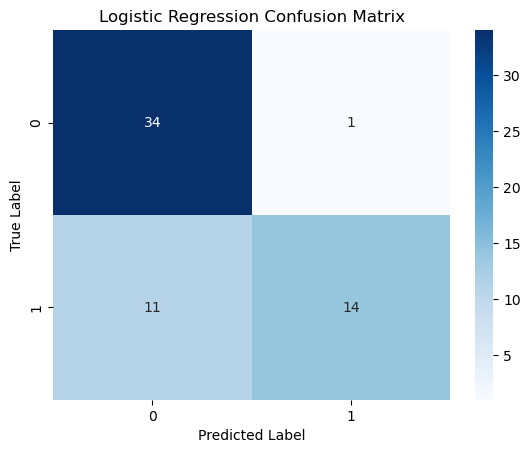


Decision Tree Confusion Matrix:


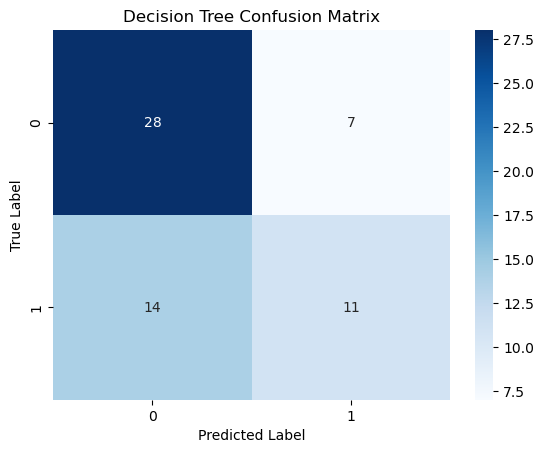


Random Forest Confusion Matrix:


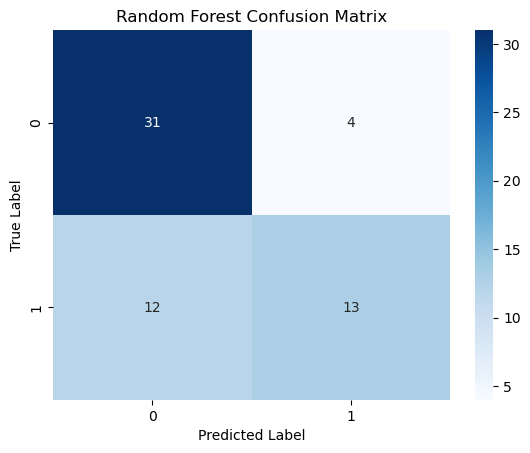

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

models = {'Logistic Regression': y_pred_log, 'Decision Tree': y_pred_dt, 'Random Forest': y_pred_rf}

for name, y_pred in models.items():
    print(f"\n{name} Confusion Matrix:")
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"{name} Confusion Matrix")
    plt.show()


In [7]:
from sklearn.model_selection import GridSearchCV

param_grid_log = {'C': [0.01, 0.1, 1, 10, 100]}
grid_log = GridSearchCV(LogisticRegression(), param_grid_log, cv=5)
grid_log.fit(X_train, y_train)

print(f"Best Parameters for Logistic Regression: {grid_log.best_params_}")


Best Parameters for Logistic Regression: {'C': 1}


In [8]:
param_grid_dt = {'max_depth': [3, 5, 10, None], 'criterion': ['gini', 'entropy']}
grid_dt = GridSearchCV(DecisionTreeClassifier(), param_grid_dt, cv=5)
grid_dt.fit(X_train, y_train)

print(f"Best Parameters for Decision Tree: {grid_dt.best_params_}")


Best Parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': 3}


In [9]:
param_grid_rf = {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 10, None]}
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid_rf, cv=5)
grid_rf.fit(X_train, y_train)

print(f"Best Parameters for Random Forest: {grid_rf.best_params_}")


Best Parameters for Random Forest: {'max_depth': 10, 'n_estimators': 100}


In [10]:
from sklearn.model_selection import cross_val_score

models = {'Logistic Regression': LogisticRegression(C=grid_log.best_params_['C']),
          'Decision Tree': DecisionTreeClassifier(**grid_dt.best_params_),
          'Random Forest': RandomForestClassifier(**grid_rf.best_params_)}

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5)
    print(f"{name} Cross-Validation Accuracy: {np.mean(scores):.4f}")


Logistic Regression Cross-Validation Accuracy: 0.7723
Decision Tree Cross-Validation Accuracy: 0.6723
Random Forest Cross-Validation Accuracy: 0.6856
